In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
images = []
for i in range(1,5001):
    images.append(cv2.imread("../datasets/question1/" + str(i) + ".jpg").reshape(4096,3))

In [3]:
images = np.array(images)

In [4]:
images.shape

(5000, 4096, 3)

In [5]:
red_images = images[:,:,0]
green_images = images[:,:,1]
blue_images = images[:,:,2]

In [6]:
red_U , red_S , red_V = np.linalg.svd(red_images, full_matrices=False)
green_U , green_S , green_V = np.linalg.svd(green_images, full_matrices=False)
blue_U , blue_S , blue_V = np.linalg.svd(blue_images, full_matrices=False)

In [7]:
first_10_red_V = red_V[0:10]
first_10_green_V = green_V[0:10]
first_10_blue_V = blue_V[0:10]

In [8]:
red_PVE = (red_S ** 2) / np.sum(red_S ** 2)

In [10]:
print(red_PVE[:10])

[0.8173209  0.02851471 0.02443124 0.01644898 0.00877841 0.00612892
 0.00581728 0.00466474 0.00374913 0.00332108]


In [11]:
green_PVE = (green_S ** 2) / np.sum(green_S ** 2)


In [12]:
print(green_PVE[:10])

[0.84269305 0.02530509 0.0213064  0.01386851 0.00723721 0.00531647
 0.00505388 0.0038718  0.0035987  0.00295344]


In [13]:
blue_PVE = (blue_S ** 2) / np.sum(blue_S ** 2)

In [14]:
print(blue_PVE[:10])

[0.86574708 0.02321492 0.01840561 0.01223756 0.00564718 0.00451281
 0.0043853  0.00344601 0.00305898 0.00247767]


In [15]:
print("Total proportions of the first ten PCA red: ", np.sum(red_PVE[:10]) , " green: ", np.sum(green_PVE[:10]) ," blue: ", np.sum(blue_PVE[:10]) )

Total proportions of the first ten PCA red:  0.9191753881317292  green:  0.9312045501612438  blue:  0.9431331283411988


In [16]:
def get_64_64(array):
    result = []
    for i in range(array.shape[0]):
        result.append(array[i].reshape(64,64))
    return np.array(result)

In [17]:
first_10_red_V   = get_64_64(first_10_red_V)
first_10_green_V = get_64_64(first_10_green_V)
first_10_blue_V  = get_64_64(first_10_blue_V)

In [18]:
merged_images = np.stack((first_10_red_V, first_10_green_V, first_10_blue_V), axis = 3)

In [19]:
merged_images = np.absolute(merged_images)

In [20]:
co = 1 / np.amax(merged_images)
merged_images = np.multiply(merged_images, co)

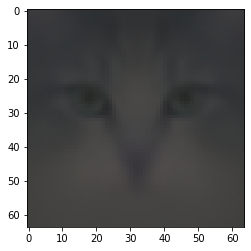

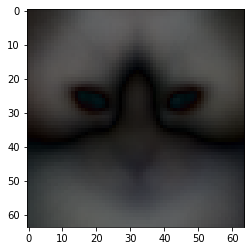

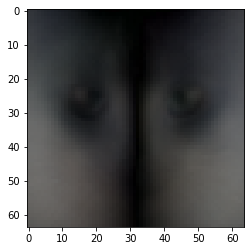

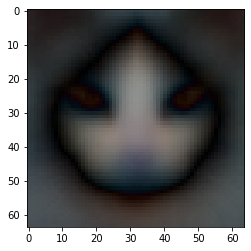

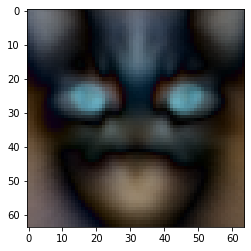

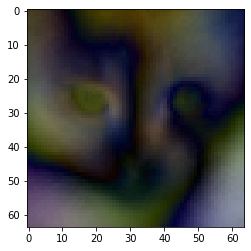

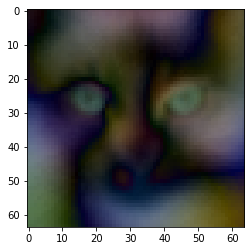

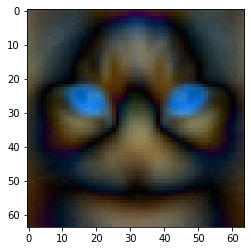

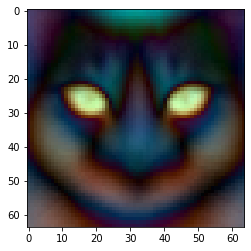

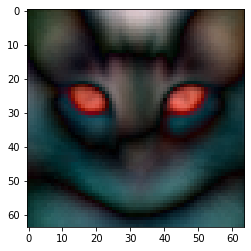

In [21]:
for i in range(merged_images.shape[0]):
    plt.imshow(merged_images[i])
    plt.show()

In [22]:
k_values = [1, 50, 250, 500]

In [23]:
def reconstruct_and_show(k_values, image_index):
    for k in k_values:
        trans_red = np.dot(red_images[image_index] ,np.transpose(red_V[:k, :]))
        inverse_red = np.dot(trans_red,red_V[:k, :]).reshape(64,64)

        trans_green = np.dot(green_images[image_index] ,np.transpose(green_V[:k, :]))
        inverse_green = np.dot(trans_green,green_V[:k, :]).reshape(64,64)


        trans_blue = np.dot(blue_images[image_index] ,np.transpose(blue_V[:k, :]))
        inverse_blue = np.dot(trans_blue, blue_V[:k, :]).reshape(64,64)
        
        first_image = np.stack((inverse_red, inverse_green, inverse_blue), axis = 2)
        co = 1 / np.amax(first_image)
        first_image = np.multiply(first_image, co)
        plt.imshow(first_image)
        plt.show()
        

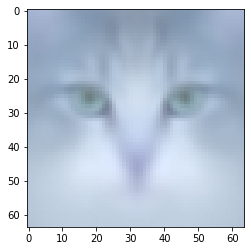

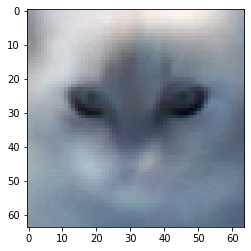

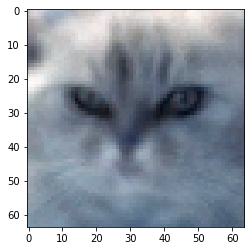

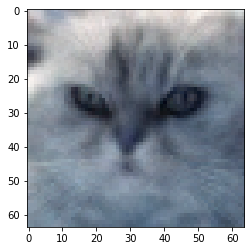

In [24]:
reconstruct_and_show(k_values, 0)